<a href="https://colab.research.google.com/github/trailmarkerlib/policeProjectPythonWorkshop/blob/main/majijuana_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grief to Action Python Workshop: Feb 20, 2024

## Pittsburgh Police Arrest Data
Data</br>
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True</br></br>

## Pittsburgh Police Non-Traffic Citation Data
Data</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616


## Objectives of this Notebook

After reviewing this notebook, you will establish a foundation for further learning and exploration of the following concepts

*   Combining datasets (concatenate rows)
*   Visualizations


## Import packages

https://learnpython.com/blog/python-libraries-for-beginners/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
import json
import requests

### Connect to Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read WPRDC arrest data

In [6]:
arr_url = 'https://raw.githubusercontent.com/trailmarkerlib/pythonWorkshop/main/data/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv'

In [7]:
arr_df = pd.read_csv(arr_url, low_memory = False)

In [8]:
arr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    65659 non-null  int64  
 1   PK                     65659 non-null  int64  
 2   CCR                    65659 non-null  int64  
 3   AGE                    65256 non-null  float64
 4   GENDER                 65659 non-null  object 
 5   RACE                   65659 non-null  object 
 6   ARRESTTIME             65659 non-null  object 
 7   ARRESTLOCATION         65659 non-null  object 
 8   OFFENSES               65656 non-null  object 
 9   INCIDENTLOCATION       65659 non-null  object 
 10  INCIDENTNEIGHBORHOOD   63199 non-null  object 
 11  INCIDENTZONE           65559 non-null  object 
 12  INCIDENTTRACT          63222 non-null  float64
 13  COUNCIL_DISTRICT       55592 non-null  float64
 14  PUBLIC_WORKS_DIVISION  55592 non-null  float64
 15  X 

## Read WPRDC non-traffic citation data

In [9]:
cit_url = 'https://raw.githubusercontent.com/trailmarkerlib/pythonWorkshop/main/data/6b11e87d-1216-463d-bbd3-37460e539d86.csv'

In [10]:
cit_df = pd.read_csv(cit_url, low_memory = False)

In [11]:
cit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16070 non-null  int64  
 1   PK                     16070 non-null  int64  
 2   CCR                    16070 non-null  object 
 3   GENDER                 16007 non-null  object 
 4   RACE                   15989 non-null  object 
 5   AGE                    15998 non-null  float64
 6   CITEDTIME              16070 non-null  object 
 7   INCIDENTLOCATION       16070 non-null  object 
 8   OFFENSES               16070 non-null  object 
 9   NEIGHBORHOOD           15310 non-null  object 
 10  ZONE                   16070 non-null  object 
 11  INCIDENTTRACT          15314 non-null  object 
 12  COUNCIL_DISTRICT       14240 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14240 non-null  float64
 14  X                      14279 non-null  float64
 15  Y 

## Combine arrests and non-traffic citations datasets

In [12]:
arr_df.columns.tolist()

['_id',
 'PK',
 'CCR',
 'AGE',
 'GENDER',
 'RACE',
 'ARRESTTIME',
 'ARRESTLOCATION',
 'OFFENSES',
 'INCIDENTLOCATION',
 'INCIDENTNEIGHBORHOOD',
 'INCIDENTZONE',
 'INCIDENTTRACT',
 'COUNCIL_DISTRICT',
 'PUBLIC_WORKS_DIVISION',
 'X',
 'Y']

In [13]:
cit_df.columns.tolist()

['_id',
 'PK',
 'CCR',
 'GENDER',
 'RACE',
 'AGE',
 'CITEDTIME',
 'INCIDENTLOCATION',
 'OFFENSES',
 'NEIGHBORHOOD',
 'ZONE',
 'INCIDENTTRACT',
 'COUNCIL_DISTRICT',
 'PUBLIC_WORKS_DIVISION',
 'X',
 'Y']

In [16]:
arr_df2 = arr_df.rename(columns={'ARRESTTIME':'TIME'}).\
  loc[:,['AGE',
          'GENDER',
          'RACE',
          'TIME',
          'OFFENSES',
          'INCIDENTLOCATION',
          'INCIDENTNEIGHBORHOOD',
          'INCIDENTZONE',
          'INCIDENTTRACT',
          'COUNCIL_DISTRICT',
          'PUBLIC_WORKS_DIVISION']].\
  copy()

In [17]:
cit_df2 = cit_df.rename(columns={'CITEDTIME':'TIME', 'LOCATION':'INCIDENTLOCATION',
                                     'NEIGHBORHOOD':'INCIDENTNEIGHBORHOOD',
                                     'ZONE':'INCIDENTZONE',
                                     'TRACT':'INCIDENTTRACT'}).\
  loc[:,['AGE',
          'GENDER',
          'RACE',
          'TIME',
          'OFFENSES',
          'INCIDENTLOCATION',
          'INCIDENTNEIGHBORHOOD',
          'INCIDENTZONE',
          'INCIDENTTRACT',
          'COUNCIL_DISTRICT',
          'PUBLIC_WORKS_DIVISION']].\
  copy()

In [60]:
arr_df2['record_type'] = 'Arrest'

In [61]:
cit_df2['record_type'] = 'Citation'

In [62]:
df = pd.concat([arr_df2, cit_df2], axis=0).copy()

In [63]:
df['record_type'].value_counts()

Arrest      65659
Citation    16070
Name: record_type, dtype: int64

#### Make a copy of the dataset

In [64]:
df_copy = df.copy()

#### Modify zone values to include 'Zone'

In [65]:
df_copy['INCIDENTZONE'] = ['Zone ' + str(x) if 'nan' not in str(x) and 'OSC' not in str(x) and 'SDD' not in str(x) else x for x in df_copy['INCIDENTZONE']]

In [66]:
df_copy.INCIDENTZONE.unique()

array(['Zone 5', 'OSC', 'Zone 1', 'Zone 4', 'Zone 6', 'Zone 3', 'Zone 2',
       nan, 'SDD'], dtype=object)

In [67]:
df_copy.INCIDENTZONE.value_counts()

Zone 3    18486
Zone 1    16403
Zone 5    14894
Zone 2    13889
Zone 4     9550
Zone 6     7960
OSC         446
SDD           1
Name: INCIDENTZONE, dtype: int64

In [68]:
summary_df = df_copy.groupby(['INCIDENTZONE', 'record_type']).\
            aggregate(offenses_notna_count = ('OFFENSES', 'count'),
                      offenses_total_rows = ('OFFENSES', 'size'),
                      average_age = ('AGE', 'mean'),
                      minimum_age = ('AGE', min),
                      maximum_age = ('AGE', max)).\
            reset_index().copy()

In [69]:
summary_df

,INCIDENTZONE,record_type,offenses_notna_count,offenses_total_rows,average_age,minimum_age,maximum_age
0,OSC,Arrest,440,440,30.851936,14.0,65.0
1,OSC,Citation,6,6,23.500000,18.0,30.0
2,SDD,Citation,1,1,47.000000,47.0,47.0
3,Zone 1,Arrest,14242,14244,33.448018,0.0,84.0
4,Zone 1,Citation,2159,2159,35.522991,0.0,85.0
5,Zone 2,Arrest,10779,10779,36.248504,0.0,999.0
6,Zone 2,Citation,3110,3110,39.078171,0.0,121.0
7,Zone 3,Arrest,12907,12907,32.718155,0.0,999.0
8,Zone 3,Citation,5579,5579,29.710867,0.0,77.0
9,Zone 4,Arrest,7084,7084,34.289145,10.0,90.0


## Filter the data to include only marijuana arrests between 2017 and 2022

In [179]:
df_copy['TIME'].head()

0    2016-08-24T12:20:00
1    2016-08-03T14:55:00
2    2016-08-03T16:45:00
3    2016-08-05T02:36:00
4    2016-08-06T02:00:00
Name: TIME, dtype: object

In [180]:
subset_df = df_copy[(df_copy['TIME'] >= "2017-01-01") & (df_copy['TIME'] < "2022-12-31")].\
          copy()

In [181]:
subset_df.shape

(69081, 12)

##### Filter by offenses

In [182]:
subset_df['marijuana_flag'] = [1 if ('marijuana' in str(x).lower()) | ('paraphernalia' in str(x).lower()) else 0 for x in subset_df['OFFENSES']]

In [183]:
subset_df.loc[subset_df['marijuana_flag'] == 1].head()

,AGE,GENDER,RACE,TIME,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,record_type,marijuana_flag
3851,54.0,M,B,2017-01-05T00:02:00,4910 Tampering with or Fabricating Physical Ev...,"2000 Block Wyandotte ST Pittsburgh, PA 15219",Crawford-Roberts,Zone 2,305.0,6.0,3.0,Arrest,1
3927,23.0,F,B,2017-01-09T17:00:00,4304(a)(1) Endangering Welfare of Children. / ...,"2000 Block 5th AV Pittsburgh, PA 15219",Bluff,Zone 2,103.0,6.0,3.0,Arrest,1
4114,15.0,M,B,2017-01-06T13:20:00,5503 Disorderly Conduct. / 13(a)(31) Marijuana...,Zone 5,NaN,Zone 5,NaN,NaN,NaN,Arrest,1
4189,34.0,M,W,2017-01-02T09:12:00,13(a)(16) Possession of Controlled Substance /...,"10 Block 40th ST Pittsburgh, PA 15201",Central Lawrenceville,Zone 2,901.0,7.0,2.0,Arrest,1
4208,20.0,M,B,2017-01-03T15:40:00,13(a)(16) Possession of Controlled Substance /...,"44th ST & Calvin ST Pittsburgh, PA 15201",Central Lawrenceville,Zone 2,902.0,7.0,2.0,Arrest,1


In [184]:
subset_df.loc[subset_df['marijuana_flag'] == 1].shape

(12612, 13)

In [185]:
mj_df = subset_df.loc[subset_df['marijuana_flag'] == 1].copy()

In [186]:
mj_df.shape

(12612, 13)

## Summarize by police zone, race, and both

In [187]:
mj_by_zone = mj_df.groupby(['INCIDENTZONE', 'record_type']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count')).\
            reset_index().copy()

In [188]:
mj_by_zone

,INCIDENTZONE,record_type,mj_count_zone
0,OSC,Arrest,141
1,OSC,Citation,4
2,Zone 1,Arrest,2966
3,Zone 1,Citation,105
4,Zone 2,Arrest,1619
5,Zone 2,Citation,102
6,Zone 3,Arrest,1971
7,Zone 3,Citation,251
8,Zone 4,Arrest,940
9,Zone 4,Citation,162


In [189]:
mj_by_race = mj_df.groupby(['RACE', 'record_type']).\
            aggregate(mj_count_race = ('OFFENSES', 'count')).\
            reset_index().copy()

In [190]:
mj_by_race

,RACE,record_type,mj_count_race
0,A,Arrest,19
1,A,Citation,3
2,B,Arrest,7123
3,B,Citation,914
4,H,Arrest,72
5,H,Citation,10
6,I,Arrest,4
7,I,Citation,1
8,O,Arrest,74
9,O,Citation,21


Note: The summary below does not mean anything without knowing the distribution of race in each zone.

In [191]:
mj_by_gender = mj_df.groupby(['GENDER', 'record_type']).\
            aggregate(mj_count_gender = ('OFFENSES', 'count')).\
            reset_index().copy()

In [192]:
mj_by_gender

,GENDER,record_type,mj_count_gender
0,F,Arrest,2627
1,F,Citation,185
2,M,Arrest,8803
3,M,Citation,982
4,U,Arrest,14


## Visualize the data

Seaborn color palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

In [193]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')

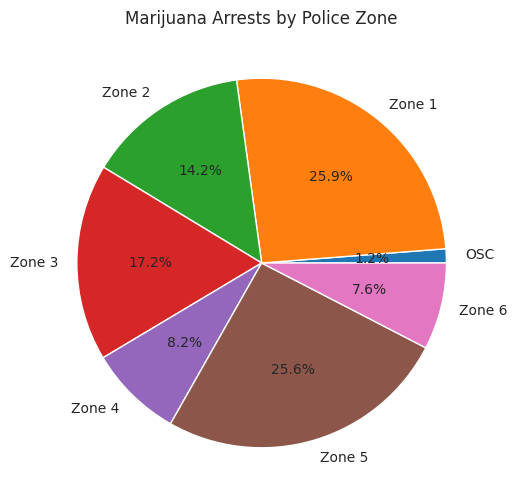

In [194]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

plt.pie(mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Arrest'],
        labels=mj_by_zone['INCIDENTZONE'].loc[mj_by_zone['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Police Zone')
plt.savefig('Marijuana_arrests_by_zone.png')
plt.show()

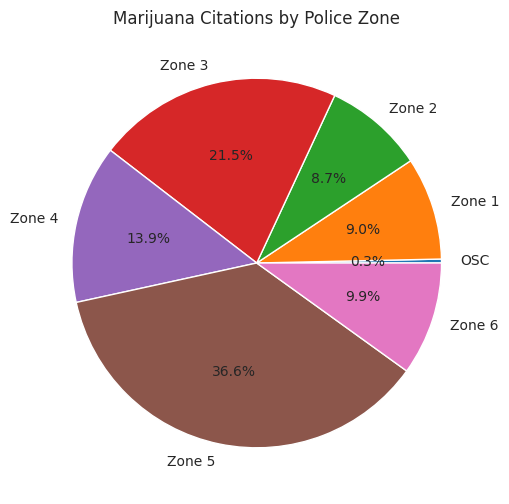

In [195]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

plt.pie(mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Citation'],
        labels=mj_by_zone['INCIDENTZONE'].loc[mj_by_zone['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Police Zone')
plt.savefig('Marijuana_citations_by_zone.png')
plt.show()

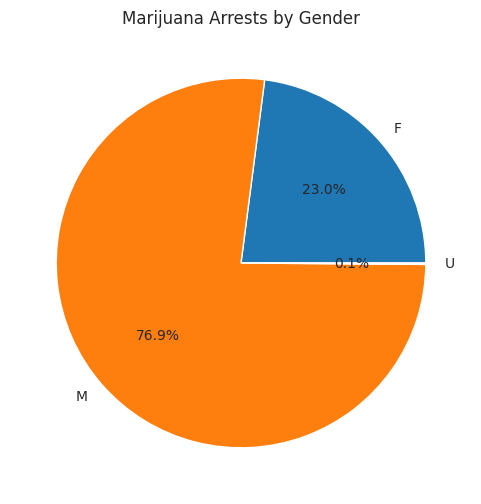

In [196]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

plt.pie(mj_by_gender['mj_count_gender'].loc[mj_by_gender['record_type']=='Arrest'],
        labels=mj_by_gender['GENDER'].loc[mj_by_gender['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Gender')
plt.savefig('Marijuana_arrests_by_gender.png')
plt.show()

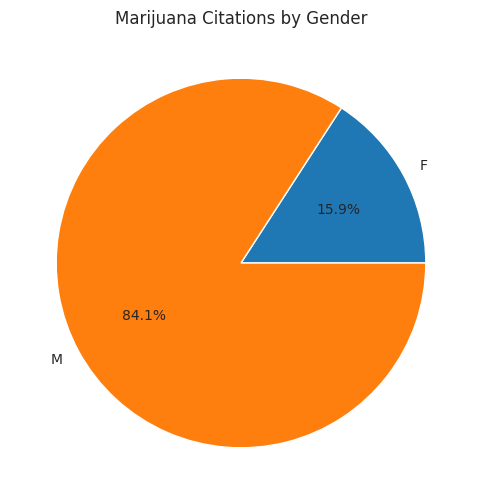

In [197]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

plt.pie(mj_by_gender['mj_count_gender'].loc[mj_by_gender['record_type']=='Citation'],
        labels=mj_by_gender['GENDER'].loc[mj_by_gender['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Gender')
plt.savefig('Marijuana_citations_by_gender.png')
plt.show()

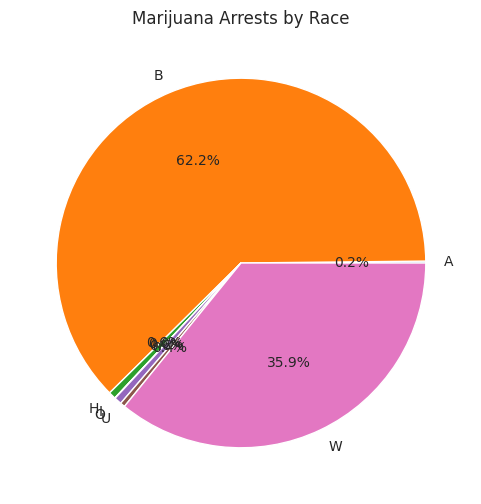

In [198]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

plt.pie(mj_by_race['mj_count_race'].loc[mj_by_race['record_type']=='Arrest'],
        labels=mj_by_race['RACE'].loc[mj_by_race['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Race')
plt.savefig('Marijuana_arrests_by_race.png')
plt.show()

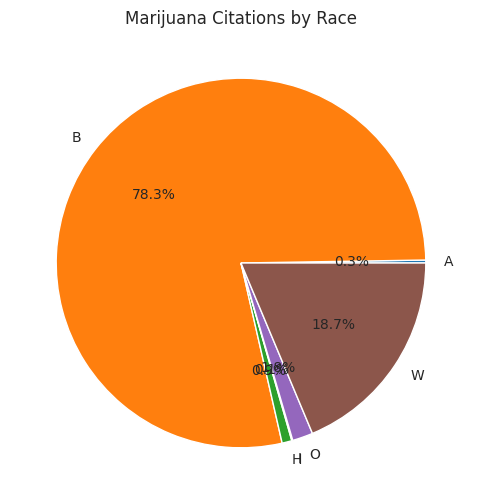

In [199]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

plt.pie(mj_by_race['mj_count_race'].loc[mj_by_race['record_type']=='Citation'],
        labels=mj_by_race['RACE'].loc[mj_by_race['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Race')
plt.savefig('Marijuana_citations_by_race.png')
plt.show()

## Summarize by dates and create line plots

In [200]:
mj_df['TIME'] = pd.to_datetime(mj_df['TIME'])

In [201]:
mj_df['YEAR'] = [x.year for x in mj_df['TIME']]

In [202]:
mj_df.tail()

,AGE,GENDER,RACE,TIME,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,record_type,marijuana_flag,YEAR
14207,29.0,M,B,2022-12-28 20:43:00,627.02(b)(i) Possessing a small amount of mari...,"FRANKSTOWN AV & EAST LIBERTY BL PITTSBURGH, PA",Larimer,Zone 5,1208,9.0,2.0,Citation,1,2022
14211,19.0,M,W,2022-12-30 02:00:00,627.02(b)(i) Possessing a small amount of mari...,"MCKEAN ST & S 1ST ST PITTSBURGH, PA",South Shore,Zone 3,1921,3.0,5.0,Citation,1,2022
14212,19.0,M,B,2022-12-30 02:00:00,627.02(b)(i) Possessing a small amount of mari...,"MCKEAN ST & S 1ST ST PITTSBURGH, PA",South Shore,Zone 3,1921,3.0,5.0,Citation,1,2022
14213,20.0,M,B,2022-12-30 02:00:00,627.02(b)(i) Possessing a small amount of mari...,"MCKEAN ST & 1ST ST PITTSBURGH, PA",South Shore,Zone 3,1921,3.0,5.0,Citation,1,2022
14264,35.0,M,B,2022-12-24 14:20:00,627.02(b)(i) Possessing a small amount of mari...,"2500 Block CHAUNCEY DR PITTSBURGH, PA",Bedford Dwellings,Zone 2,509,6.0,3.0,Citation,1,2022


In [203]:
summ_by_year_df = mj_df.groupby(['YEAR', 'record_type']).\
            aggregate(rec_count=('TIME', 'count')).\
            reset_index().\
            copy()

In [204]:
summ_by_year_df

,YEAR,record_type,rec_count
0,2017,Arrest,2841
1,2017,Citation,191
2,2018,Arrest,2504
3,2018,Citation,157
4,2019,Arrest,2392
5,2019,Citation,236
6,2020,Arrest,1732
7,2020,Citation,201
8,2021,Arrest,1136
9,2021,Citation,217


#### Create a line plot: Number of Arrests by Year

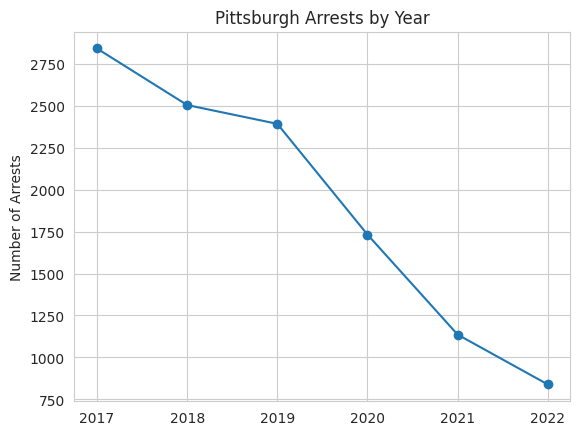

In [205]:
plt.plot(summ_by_year_df['YEAR'].loc[summ_by_year_df['record_type']=='Arrest'],
         summ_by_year_df['rec_count'].loc[summ_by_year_df['record_type']=='Arrest'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')
plt.ylabel('Number of Arrests')
plt.show()

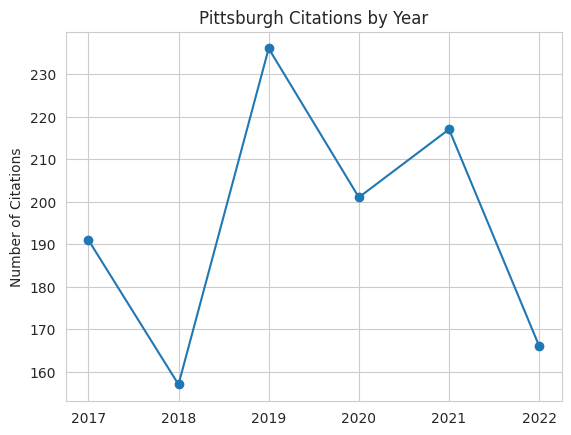

In [206]:
plt.plot(summ_by_year_df['YEAR'].loc[summ_by_year_df['record_type']=='Citation'],
         summ_by_year_df['rec_count'].loc[summ_by_year_df['record_type']=='Citation'], marker='o', linestyle='solid')
plt.title('Pittsburgh Citations by Year')
plt.ylabel('Number of Citations')
plt.show()

#### Create a line plot: Number of Arrests by Month

In [207]:
mj_df['MNYR'] = mj_df['TIME'].dt.strftime('%Y-%m')

In [208]:
mj_df['MNYR'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype=object)

#### Subset arrests to include only 2022 and summarize by month

In [209]:
summ_by_month_df = mj_df.groupby(['YEAR', 'MNYR', 'record_type']).\
            aggregate(rec_count=('TIME', 'count')).\
            reset_index().\
            sort_values('MNYR').\
            copy()

In [210]:
summ_by_month_df.head(10)

,YEAR,MNYR,record_type,rec_count
0,2017,2017-01,Arrest,178
1,2017,2017-01,Citation,6
2,2017,2017-02,Arrest,216
3,2017,2017-02,Citation,7
4,2017,2017-03,Arrest,225
5,2017,2017-03,Citation,16
6,2017,2017-04,Arrest,216
7,2017,2017-04,Citation,10
8,2017,2017-05,Arrest,265
9,2017,2017-05,Citation,10


In [211]:
summ_by_month_df.YEAR.unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [212]:
summ_year_2021_2022 = summ_by_month_df.loc[(summ_by_month_df['YEAR'] >= 2021) & (summ_by_month_df['YEAR'] <= 2022)].copy()

In [213]:
summ_year_2021_2022

,YEAR,MNYR,record_type,rec_count
96,2021,2021-01,Arrest,79
97,2021,2021-01,Citation,16
99,2021,2021-02,Citation,23
98,2021,2021-02,Arrest,117
100,2021,2021-03,Arrest,124
101,2021,2021-03,Citation,27
102,2021,2021-04,Arrest,96
103,2021,2021-04,Citation,19
104,2021,2021-05,Arrest,93
105,2021,2021-05,Citation,25


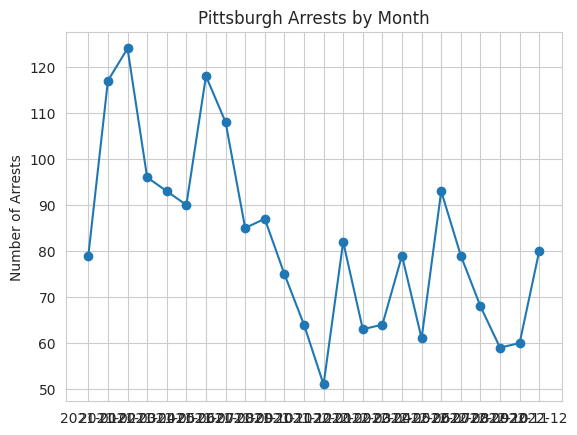

In [214]:
plt.plot(summ_year_2021_2022['MNYR'].loc[summ_year_2021_2022['record_type']=='Arrest'],
         summ_year_2021_2022['rec_count'].loc[summ_year_2021_2022['record_type']=='Arrest'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Month')
plt.ylabel('Number of Arrests')
plt.show()

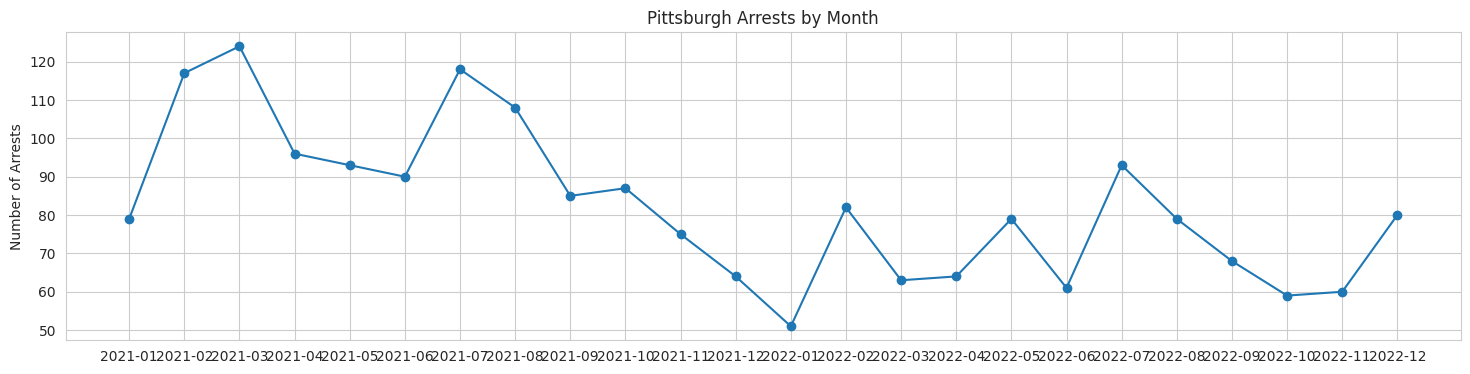

In [215]:
plt.figure(figsize=(18,4))
plt.plot(summ_year_2021_2022['MNYR'].loc[summ_year_2021_2022['record_type']=='Arrest'],
         summ_year_2021_2022['rec_count'].loc[summ_year_2021_2022['record_type']=='Arrest'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Month')
plt.ylabel('Number of Arrests')
plt.show()

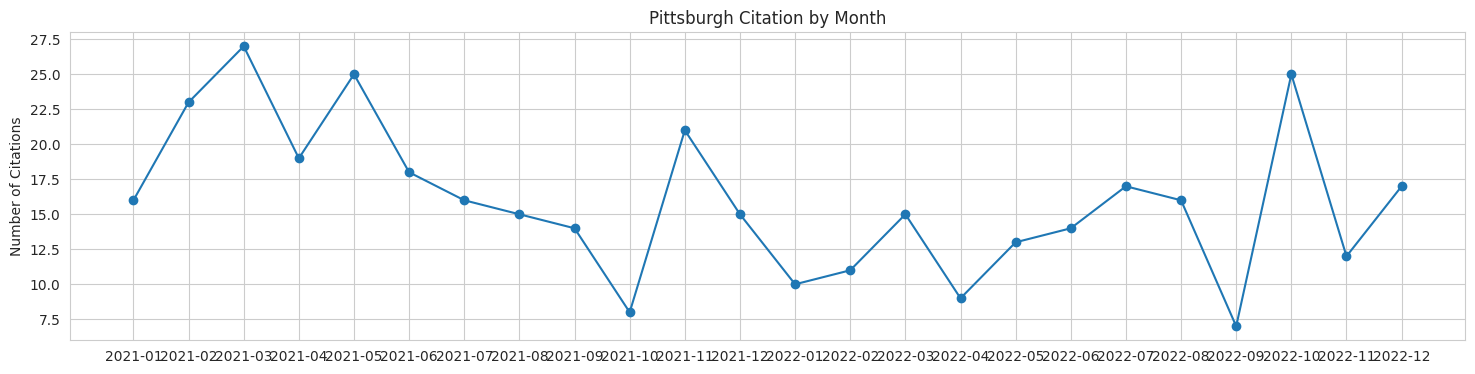

In [216]:
plt.figure(figsize=(18,4))
plt.plot(summ_year_2021_2022['MNYR'].loc[summ_year_2021_2022['record_type']=='Citation'],
         summ_year_2021_2022['rec_count'].loc[summ_year_2021_2022['record_type']=='Citation'], marker='o', linestyle='solid')
plt.title('Pittsburgh Citation by Month')
plt.ylabel('Number of Citations')
plt.show()

#### Use Seaborn to create a lineplot
https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [219]:
mj_df['MONTH'] = mj_df['TIME'].dt.strftime('%B')

In [220]:
mj_df.head()

,AGE,GENDER,RACE,TIME,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,record_type,marijuana_flag,YEAR,MNYR,MONTH
3851,54.0,M,B,2017-01-05 00:02:00,4910 Tampering with or Fabricating Physical Ev...,"2000 Block Wyandotte ST Pittsburgh, PA 15219",Crawford-Roberts,Zone 2,305.0,6.0,3.0,Arrest,1,2017,2017-01,January
3927,23.0,F,B,2017-01-09 17:00:00,4304(a)(1) Endangering Welfare of Children. / ...,"2000 Block 5th AV Pittsburgh, PA 15219",Bluff,Zone 2,103.0,6.0,3.0,Arrest,1,2017,2017-01,January
4114,15.0,M,B,2017-01-06 13:20:00,5503 Disorderly Conduct. / 13(a)(31) Marijuana...,Zone 5,NaN,Zone 5,NaN,NaN,NaN,Arrest,1,2017,2017-01,January
4189,34.0,M,W,2017-01-02 09:12:00,13(a)(16) Possession of Controlled Substance /...,"10 Block 40th ST Pittsburgh, PA 15201",Central Lawrenceville,Zone 2,901.0,7.0,2.0,Arrest,1,2017,2017-01,January
4208,20.0,M,B,2017-01-03 15:40:00,13(a)(16) Possession of Controlled Substance /...,"44th ST & Calvin ST Pittsburgh, PA 15201",Central Lawrenceville,Zone 2,902.0,7.0,2.0,Arrest,1,2017,2017-01,January


Passing the entire dataset will aggregate over repeated values (each year) to show the mean and 95% confidence interval:

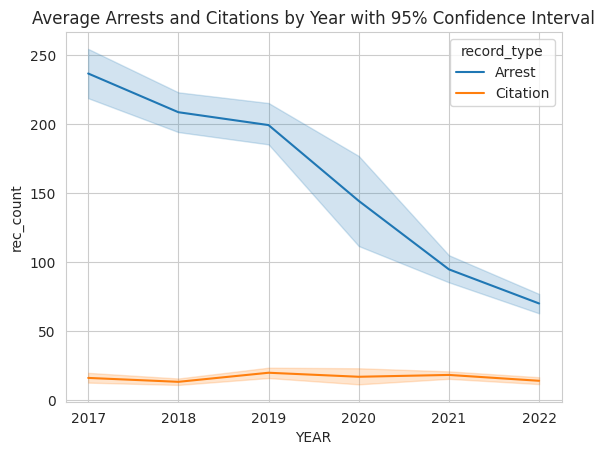

In [236]:
sns.set_style("whitegrid")
sns.lineplot(data=mj_by_month_year, x='YEAR', y='rec_count', hue='record_type')
plt.title('Average Arrests and Citations by Year with 95% Confidence Interval')
plt.show()

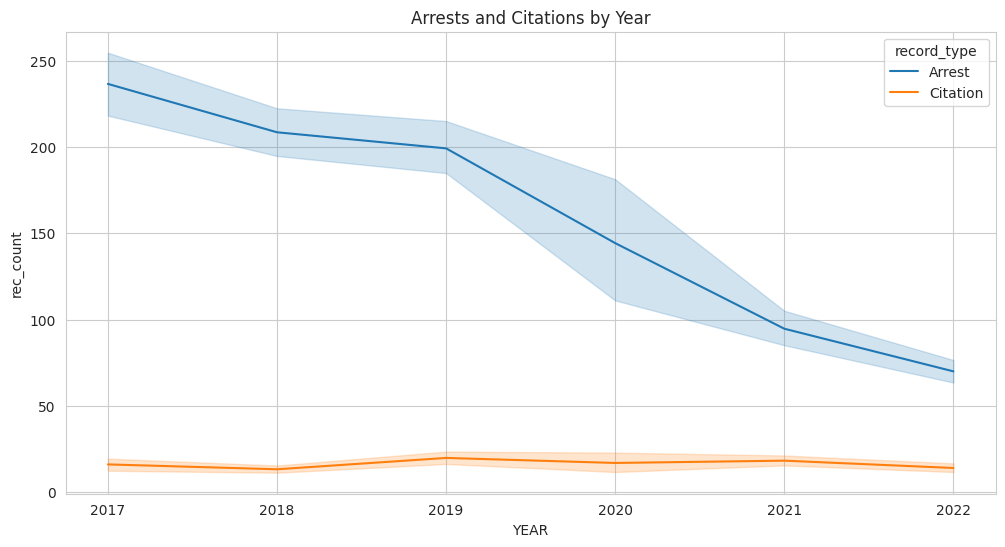

In [234]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=mj_by_month_year, x="YEAR", y="rec_count", hue='record_type')
plt.title('Arrests and Citations by Year')
plt.show()

## Stacked Bar Charts - not finished

In [ ]:
arr_by_zone_by_race.merge(mj_by_zone, how='left', on='INCIDENTZONE')

,INCIDENTZONE,RACE,mj_count_race,mj_count_zone
0,OSC,B,80,110
1,OSC,U,1,110
2,OSC,W,29,110
3,Zone 1,A,5,2608
4,Zone 1,B,1492,2608
5,Zone 1,H,14,2608
6,Zone 1,I,2,2608
7,Zone 1,O,12,2608
8,Zone 1,U,6,2608
9,Zone 1,W,1077,2608


In [ ]:
pivot_df = arr_by_zone_by_race.pivot(index='INCIDENTZONE', columns='RACE', values='mj_count_race').copy()

In [ ]:
arr_pivot_df

RACE,A,B,H,I,O,U,W
INCIDENTZONE,,,,,,,
OSC,NaN,80.0,NaN,NaN,NaN,1.0,29.0
Zone 1,5.0,1492.0,14.0,2.0,12.0,6.0,1077.0
Zone 2,3.0,925.0,12.0,NaN,8.0,6.0,449.0
Zone 3,3.0,806.0,13.0,NaN,22.0,17.0,935.0
Zone 4,1.0,431.0,6.0,NaN,8.0,1.0,330.0
Zone 5,4.0,1766.0,10.0,1.0,9.0,13.0,505.0
Zone 6,1.0,355.0,4.0,NaN,10.0,1.0,360.0


In [ ]:
cit_by_zone_by_race = mj_cit_df.groupby(['ZONE', 'RACE']).\
            aggregate(mj_count_race = ('PK', 'count')).\
            reset_index().copy()

In [ ]:
cit_by_zone_by_race

,ZONE,RACE,mj_count_race
0,OSC,B,1
1,Zone 1,B,47
2,Zone 1,O,1
3,Zone 1,W,14
4,Zone 2,A,1
5,Zone 2,B,55
6,Zone 2,H,1
7,Zone 2,O,2
8,Zone 2,W,16
9,Zone 3,B,105


In [ ]:
cit_pivot_df = cit_by_zone_by_race.pivot(index='ZONE', columns='RACE', values='mj_count_race').copy()

In [ ]:
cit_pivot_df

RACE,A,B,H,I,O,W
ZONE,,,,,,
OSC,NaN,1.0,NaN,NaN,NaN,NaN
Zone 1,NaN,47.0,NaN,NaN,1.0,14.0
Zone 2,1.0,55.0,1.0,NaN,2.0,16.0
Zone 3,NaN,105.0,2.0,NaN,2.0,54.0
Zone 4,NaN,61.0,1.0,NaN,4.0,42.0
Zone 5,NaN,242.0,4.0,1.0,NaN,20.0
Zone 6,NaN,30.0,NaN,NaN,1.0,18.0


Text(0, 0.5, 'Percentage Ranges')

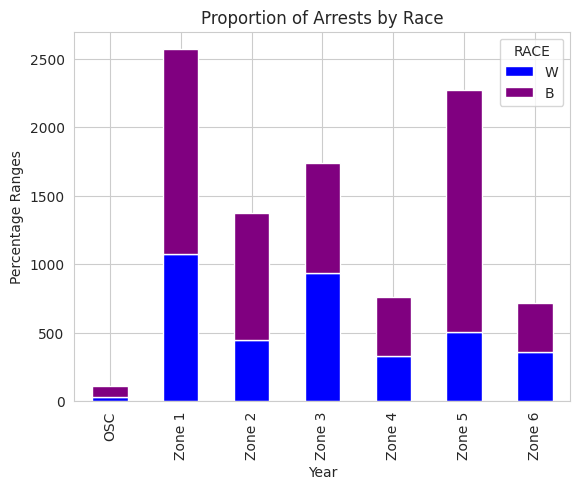

In [ ]:
# create stacked bar chart for students DataFrame
arr_pivot_df.loc[:,['W','B']].plot(kind='bar', stacked=True, color=['pink', 'purple'])

# Add Title and Labels
plt.title('Proportion of Arrests by Race')
plt.xlabel('Zone')
plt.ylabel('Count Ranges')

Text(0, 0.5, 'Percentage Ranges')

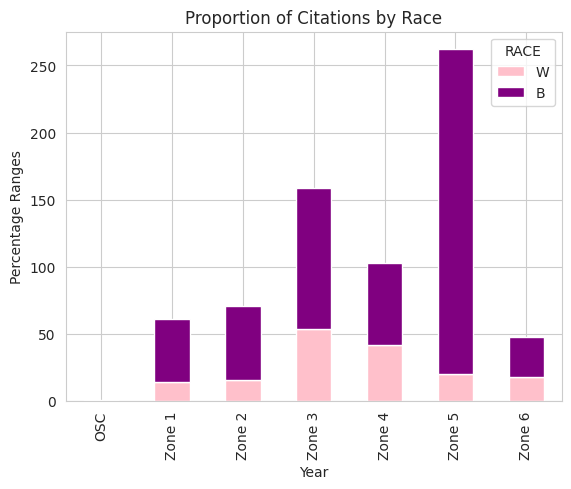

In [ ]:
# create stacked bar chart for students DataFrame
cit_pivot_df.loc[:,['W','B']].plot(kind='bar', stacked=True, color=['pink', 'purple'])

# Add Title and Labels
plt.title('Proportion of Citations by Race')
plt.xlabel('Zone')
plt.ylabel('Count Ranges')